<a href="https://colab.research.google.com/github/Rudh1830/Facial-Feature-Based-Gender-Classification-using-Logistic-Regression/blob/main/Facial_Feature_Based_Gender_Classification_using_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Logistic Regression**
Sigmoid curve( s or bell shaped curve)

In [3]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('/content/gender_classification_v7.csv')

# Display the first 5 rows of the DataFrame
display(df.head())

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [5]:
# Convert 'gender' column to numerical (0 for Female, 1 for Male)
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)

# Display the updated head and check the value counts of the target variable
display(df.head())
display(df['gender'].value_counts())

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


,count
gender,
0,2501
1,2500


In [6]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('gender', axis=1) # All columns except 'gender'
y = df['gender'] # The 'gender' column is our target

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")

Training features shape: (4000, 7)
Testing features shape: (1001, 7)
Training target shape: (4000,)
Testing target shape: (1001,)


In [4]:
# Display a concise summary of the DataFrame, including data types and non-null values
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


None

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42, solver='liblinear') # Using 'liblinear' solver for smaller datasets

# Train the model
model.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


In [8]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(report)
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy: 0.9560

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       502
           1       0.95      0.96      0.96       499

    accuracy                           0.96      1001
   macro avg       0.96      0.96      0.96      1001
weighted avg       0.96      0.96      0.96      1001


Confusion Matrix:
[[477  25]
 [ 19 480]]


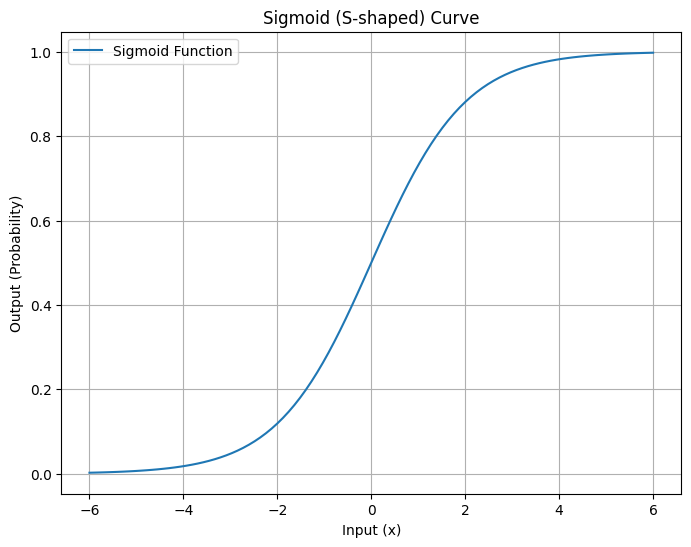

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate a range of values for x
x_values = np.linspace(-6, 6, 100)

# Calculate the corresponding sigmoid values
y_values = sigmoid(x_values)

# Plot the sigmoid curve
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='Sigmoid Function')
plt.title('Sigmoid (S-shaped) Curve')
plt.xlabel('Input (x)')
plt.ylabel('Output (Probability)')
plt.grid(True)
plt.legend()
plt.show()